In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

2024-04-03 08:36:43.199657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 08:36:43.199803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 08:36:43.392402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
training_data = tf.keras.utils.image_dataset_from_directory(
'/kaggle/input/testing/flowerdataset/train',
seed = 42,
image_size = (250,250),
batch_size = 128)

x_training = []
y_training = []
for images, labels in training_data.unbatch():
    x_training.append(images.numpy())
    y_training.append(labels.numpy())

x_training = np.array(x_training)
y_training = np.array(y_training)

Found 4876 files belonging to 10 classes.


In [3]:
testing_data = tf.keras.utils.image_dataset_from_directory(
'/kaggle/input/testing/flowerdataset/test',
seed = 42,
image_size = (250,250),
batch_size = 128)

x_test = []
y_test = []
for images, labels in testing_data.unbatch():
    x_test.append(images.numpy())
    y_test.append(labels.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test.shape, y_test.shape

Found 1614 files belonging to 10 classes.


((1614, 250, 250, 3), (1614,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x_training, y_training, test_size=0.2, random_state = 42,  stratify = y_training)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3900, 250, 250, 3), (3900,), (976, 250, 250, 3), (976,))

In [5]:
import os 
import cv2
import PIL as Image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Reshape, InputLayer


In [6]:
import cv2
import glob
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [7]:
train_arr = np.dot(X_train[...,:3], [0.2989, 0.5870, 0.1140])

In [8]:
valid_arr = np.dot(X_valid[...,:3], [0.2989, 0.5870, 0.1140])

In [9]:
test_arr = np.dot(x_test[...,:3], [0.2989, 0.5870, 0.1140])

In [10]:
train_arr.shape

(3900, 250, 250)

In [10]:
train_arr[0].min()

3.951390460205078

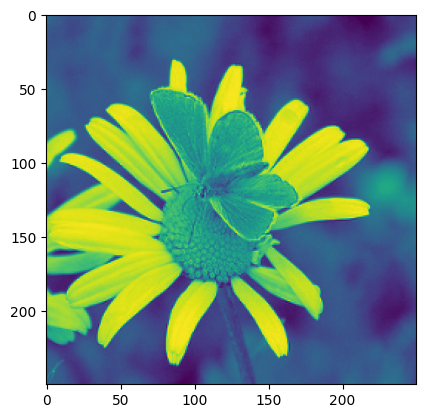

In [11]:
plt.imshow(train_arr[1].astype("uint8"))

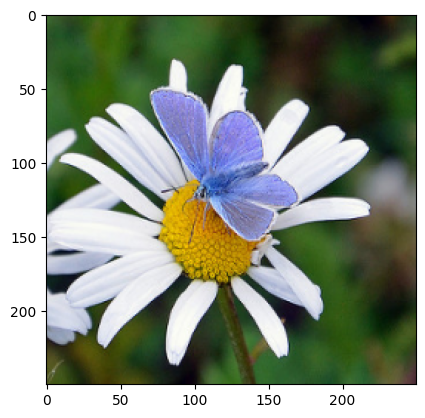

In [12]:
plt.imshow(X_train[1].astype("uint8"))

In [13]:
train_class = training_data.class_names
len(train_class)

10

In [14]:
len(train_arr)

3900

In [40]:
train_images = train_arr.reshape(len(train_arr), 250,250, 1)

valid_images = valid_arr.reshape(len(valid_arr), 250,250, 1)

test_images = test_arr.reshape(len(test_arr), 250,250, 1)

test_images.shape

(1614, 250, 250, 1)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(250,250, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3,padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=3),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5,padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3,padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(train_class), activation='softmax')
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 250, 250, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 82, 82, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 78, 78, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,458 (603.35 KB)

 Trainable params: 154,394 (603.10 KB)

 Non-trainable params: 64 (256.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history = model.fit(train_images,y_train, epochs=50, validation_data=(valid_images, y_valid))

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 89s 710ms/step - accuracy: 0.1468 - loss: 20.2666 - val_accuracy: 0.1742 - val_loss: 2.8181
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 86s 707ms/step - accuracy: 0.2462 - loss: 2.4622 - val_accuracy: 0.1885 - val_loss: 2.4606
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 711ms/step - accuracy: 0.2666 - loss: 2.2746 - val_accuracy: 0.2469 - val_loss: 2.3573
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 141s 703ms/step - accuracy: 0.3002 - loss: 2.2179 - val_accuracy: 0.2469 - val_loss: 2.3727
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 707ms/step - accuracy: 0.3266 - loss: 2.1703 - val_accuracy: 0.3289 - val_loss: 2.1926
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 708ms/step - accuracy: 0.3430 - loss: 2.1309 - val_accuracy: 0.3166 - val_loss: 2.1927
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 708ms/step - accuracy: 0.3635 - loss: 2.0791 - val_accuracy: 0.3760 - val_loss: 2.1279
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 141s 697ms/step - accuracy: 0.3618 - 

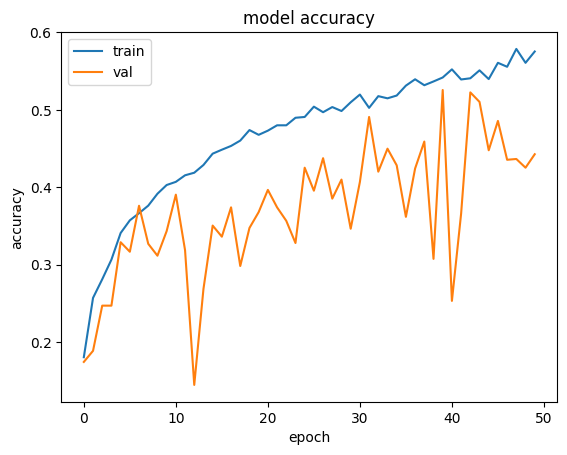

In [24]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
test_classes =[i for i in os.listdir("/kaggle/input/testing/flowerdataset/test")]
train_classes =[i for i in os.listdir("/kaggle/input/testing/flowerdataset/train")]
print("Test Classes:",test_classes)
print("\nTrain Classes:", train_classes)

Test Classes: ['Orchid', 'Dandelion', 'Daisy', 'Carnation', 'Sunflower', 'Tulip', 'Lotus', 'Rose', 'Lilly', 'Iris']

Train Classes: ['Orchid', 'Dandelion', 'Daisy', 'Carnation', 'Sunflower', 'Tulip', 'Lotus', 'Rose', 'Lilly', 'Iris']


In [26]:
y=model.predict(test_arr)
y_pred= np.argmax(y, axis= 1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
conf_metrix=confusion_matrix(y_pred, y_test)
conf_test = (conf_metrix/ conf_metrix.astype('int').sum(axis=1)) * 100
conf_test.astype('int')

array([[ 22,  30,   9,  11, 152, 285, 103,  73,   2, 350],
       [  0,  66,   8,   0,  28,  78,   3,   0,   1,  11],
       [  0,   5,  80,   0,  12,  35,   3,   1,   1,  11],
       [  3,   5,  14,  46,  52,  85,  35,  11,   1, 427],
       [  0,   0,   0,   0,  48,  21,  28,   0,   0,   5],
       [  0,   0,   0,   0,   4,  78,   3,   0,   0,   5],
       [  0,   0,   0,   0,  28,   7,  39,   0,   0,  44],
       [  3,   0,   0,   0,  40,  50,  35,  41,   0, 100],
       [  1,  39,  22,   3,  36,  71,  60,  24,  47,  88],
       [  0,   0,   0,   0,   0,   0,   3,   0,   0,  94]])

Classification Report for Testing Data:
              precision    recall  f1-score   support

      Orchid       0.70      0.22      0.34       457
   Dandelion       0.45      0.66      0.53       139
       Daisy       0.59      0.80      0.68       145
   Carnation       0.73      0.46      0.57       326
   Sunflower       0.12      0.48      0.19        25
       Tulip       0.11      0.79      0.19        14
       Lotus       0.12      0.39      0.19        28
        Rose       0.27      0.42      0.33       110
       Lilly       0.85      0.47      0.61       352
        Iris       0.08      0.94      0.15        18

    accuracy                           0.45      1614
   macro avg       0.40      0.56      0.38      1614
weighted avg       0.65      0.45      0.48      1614



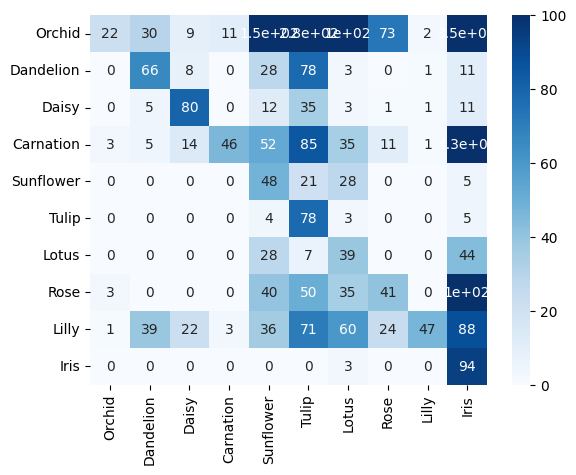

In [31]:
import seaborn as sns
from sklearn.metrics import classification_report
sns.heatmap(conf_test.astype('int'),annot=True, vmin = 0, vmax = 100, xticklabels=test_classes, yticklabels=test_classes,cmap='Blues')

report = classification_report(y_pred, y_test, target_names=test_classes)
print("Classification Report for Testing Data:")
print(report)

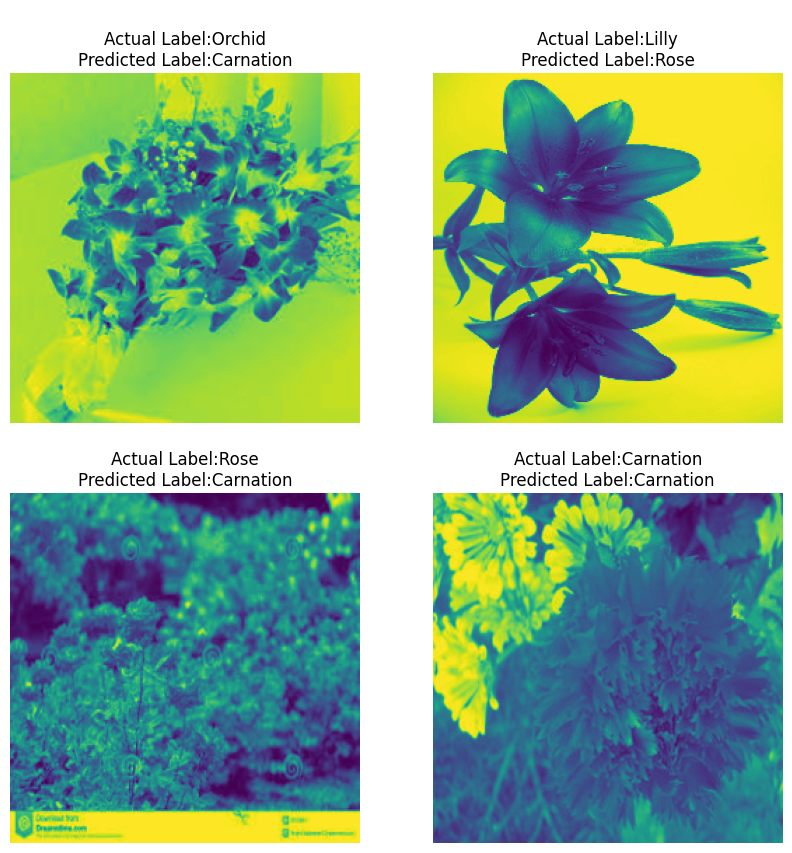

In [32]:
class_names = testing_data.class_names
plt.figure(figsize=(10, 10))
index_array = np.random.randint(1,len(y_test), 4)
j = 1
for i in index_array:
        ax = plt.subplot(2,2,j)
        plt.imshow(test_arr[i].astype("uint8"))
        plt.title('\nActual Label:' + class_names[y_test[i]]+ '\nPredicted Label:'+ class_names[y_pred[i]])
        plt.axis("off")
        j+= 1


In [36]:
test_arr.shape

(1614, 250, 250)

In [38]:
train_arr.shape

(3900, 250, 250)

In [37]:
y_train.shape, y_test.shape

((3900,), (1614,))

In [42]:
acc_score = model.evaluate(test_images, y_test)
acc_score

51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.4434 - loss: 2.3044


[2.2683098316192627, 0.4491945505142212]